In [8]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = "C:/Users/dpawa/PycharmProjects/daen690/Mask_RCNN/"

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "xview_new_weights.h5")
# Download COCO trained weights from Releases if needed

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "image")
#OutIMAGE_DIR = "/home/ashwin/Desktop/Test/jupyter_output"


In [9]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [3]:

annFile='C:/Users/dpawa/PycharmProjects/daen690/Mask_RCNN/samples/combined_xview_damage_assessment_dataset_val.json'
coco_n=COCO(annFile)


loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


In [5]:
class_ids = coco.getCatIds()
cats = coco_n.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))
print(class_ids)

COCO categories: 
no-damage minor-damage major-damage destroyed

COCO supercategories: 
building
[0, 1, 2, 3]


In [ ]:
class_names = ['BG','no-damage','minor-damage','major-damage','destroyed']


In [10]:
dataset = coco.CocoDataset()
val_type = "train" 
dataset_path = "C:\\Users\\dpawa\\PycharmProjects\\daen690\\Mask_RCNN\\samples\\test_pre_post"


In [11]:
dataset.load_coco(dataset_path, val_type, year="2019")
dataset.prepare()
print(dataset.image_ids)

loading annotations into memory...
Done (t=2.69s)
creating index...
index created!
[   0    1    2 ... 2238 2239 2240]


In [12]:
image_id = random.choice(dataset.image_ids)
print(image_id)



497


In [13]:
annotations = dataset.image_info[image_id]["annotations"]
annotation = (annotations[1])

In [21]:
image_info = dataset.image_info[image_id]
print(annotation)

{'segmentation': [[151.0459322949639, 503.6101707429117, 145.4935931515677, 524.3710910139338, 124.9740789289913, 519.5429700213017, 125.4568910302823, 514.4734429799739, 122.3186123826809, 513.9906308784227, 125.4568910276823, 501.6789223471069, 128.3537636271081, 501.6789223471069, 128.1123575760726, 499.0234557989752, 134.3889148665953, 500.9547041989401, 133.6646967173888, 503.3687646942161, 135.1131330184017, 504.0929828423829, 136.0787572144837, 499.9890799979177, 151.0459322949639, 503.6101707429117]], 'iscrowd': 0, 'image_id': 650, 'category_id': 0, 'id': 32848, 'bbox': [122.3186123826809, 499.0234557989752, 28.727319912283008, 25.347635214958586], 'area': 505.0}


In [20]:
instance_masks = []
class_ids = []
for annotation in annotations:
    class_id = dataset.map_source_class_id(
        "coco.{}".format(annotation['category_id']))
    if class_id:
        m = dataset.annToMask(annotation, image_info["height"],
                           image_info["width"])
        
        if m.max() < 1:
            continue
        if annotation['iscrowd']:
            class_id *= -1
            
            if m.shape[0] != image_info["height"] or m.shape[1] != image_info["width"]:
                m = np.ones([image_info["height"], image_info["width"]], dtype=bool)
        instance_masks.append(m)
        class_ids.append(class_id)

In [22]:
print(class_ids)

[1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1]


In [52]:
from pycocotools import mask as maskUtils

segm = annotation['segmentation']
if isinstance(segm, list):
    # polygon -- a single object might consist of multiple parts
    # we merge all parts into one mask rle code
    rles = maskUtils.frPyObjects(segm, 1024, 1024)
    rle = maskUtils.merge(rles)

In [53]:
print(rle)

{'size': [1024, 1024], 'counts': b'h[g>3ko03N1N3N2M2O2M3M2O2M2jPOYORo0k0N3N2M3M2O2O1O01000O10O10O1000O010jN]QOn0cn0PO_QOo0an0oNaQOQ1hn0N2M3N1N3M3N2M2O2M3M3N1N3N2MXdk?'}


In [54]:
dataset.annToMask(annotation,1024,1024)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [55]:
print((annotations))

[{'segmentation': [[152.2687373008932, 944.3754894489296, 138.9985343765856, 944.6356895063201, 138.0878341750064, 931.8858866937103, 141.4704349232203, 931.625686638219, 140.9500348051156, 927.0721856348347, 154.7406378446793, 925.380885260372, 156.822238304516, 938.7811882150336, 152.2687373011306, 939.3015883307643, 152.2687373008932, 944.3754894489296]], 'iscrowd': 0, 'image_id': 1, 'category_id': 2, 'id': 1, 'bbox': [138.0878341750064, 925.380885260372, 18.734404129509585, 19.254804245948094], 'area': 282.0}, {'segmentation': [[184.1917088924554, 973.4325207768328, 191.6995012907324, 979.1033001414421, 188.6644362785569, 984.6143392424401, 180.996903616906, 979.1033001414421, 184.1917088924554, 973.4325207768328]], 'iscrowd': 0, 'image_id': 1, 'category_id': 2, 'id': 2, 'bbox': [180.996903616906, 973.4325207768328, 10.702597673826403, 11.181818465607307], 'area': 59.0}, {'segmentation': [[171.7523928225672, 1022.980987830608, 165.5476841804262, 1018.591915647259, 173.2948792081549

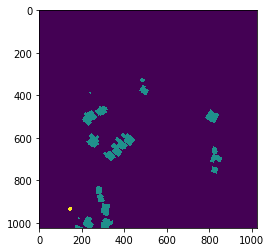

In [56]:
import matplotlib.pyplot as plt
mask = dataset.annToMask(annotations[0],1024,1024)
for i in range(len(annotations)):
    mask += dataset.annToMask(annotations[i],1024,1024)
plt.imshow(mask)